In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import numpy as np

In [2]:
df = pd.read_csv("G:/My Drive/Education/MSc Biomedical Engineering/Medical Physics, imaging and image processing/"
                  "Project/IEEEXplore_Artificial_Intelligence_PET_CT.csv")
df.head()

,Document Title,Authors,Author Affiliations,Publication Title,Date Added To Xplore,Publication Year,Volume,Issue,Start Page,End Page,...,Mesh_Terms,Article Citation Count,Patent Citation Count,Reference Count,License,Online Date,Issue Date,Meeting Date,Publisher,Document Identifier
0,Development of a deep learning method for CT-f...,S. Xue; K. P. Bohn; R. Guo; H. Sari; M. Viscio...,"University of Bern,Dept. Nuclear Medicine,Bern...",2021 43rd Annual International Conference of t...,09-Dec-21,2021,NaN,NaN,4120,4122,...,Artificial Intelligence;China;Deep Learning;Hu...,NaN,NaN,16.0,NaN,09-Dec-21,NaN,NaN,IEEE,IEEE Conferences
1,Novel deep learning-based CT synthesis algorit...,H. Arabi; G. Zeng; G. Zheng; H. Zaidi,Division of Nuclear Medicine & Molecular Imagi...,2018 IEEE Nuclear Science Symposium and Medica...,05-Sep-19,2018,NaN,NaN,1,3,...,NaN,NaN,NaN,12.0,NaN,05-Sep-19,NaN,NaN,IEEE,IEEE Conferences
2,Contrast CT image generation model using CT im...,W. Kim; S. -K. Woo; J. Park; H. Sheen; I. Lim;...,Korea Institutes of Radiological and Medical S...,2018 IEEE Nuclear Science Symposium and Medica...,05-Sep-19,2018,NaN,NaN,1,3,...,NaN,NaN,NaN,11.0,NaN,05-Sep-19,NaN,NaN,IEEE,IEEE Conferences
3,A Self Organizing Map for Exploratory Analysis...,E. Alsyed; R. Smith; S. Paisey; C. Marshall; E...,"School of Engineering, Cardiff University,Card...",2020 IEEE Nuclear Science Symposium and Medica...,12-Aug-21,2020,NaN,NaN,1,3,...,NaN,NaN,NaN,17.0,NaN,12-Aug-21,NaN,NaN,IEEE,IEEE Conferences
4,PET-Train: Automatic Ground Truth Generation f...,C. Gsaxner; B. Pfarrkirchner; L. Lindner; A. P...,"Inst. of Computer Graphics and Vision, Graz Un...",2018 11th Biomedical Engineering International...,13-Jan-19,2018,NaN,NaN,1,5,...,NaN,3.0,NaN,20.0,NaN,13-Jan-19,NaN,NaN,IEEE,IEEE Conferences


Check which columns are present on the dataframe


In [3]:
df.columns

Index(['Document Title', 'Authors', 'Author Affiliations', 'Publication Title',
       'Date Added To Xplore', 'Publication Year', 'Volume', 'Issue',
       'Start Page', 'End Page', 'Abstract', 'ISSN', 'ISBNs', 'DOI',
       'Funding Information', 'PDF Link', 'Author Keywords', 'IEEE Terms',
       'INSPEC Controlled Terms', 'INSPEC Non-Controlled Terms', 'Mesh_Terms',
       'Article Citation Count', 'Patent Citation Count', 'Reference Count',
       'License', 'Online Date', 'Issue Date', 'Meeting Date', 'Publisher',
       'Document Identifier'],
      dtype='object')

Keep only needed columns

In [4]:
df = df.loc[:,['Document Title', 'Authors', 'Abstract','Author Keywords', 'IEEE Terms', 'Article Citation Count',
               'Publication Year', 'DOI']]

Find unique terms


In [5]:
unique_terms = pd.unique(pd.concat([df["Author Keywords"].str.split(";", expand=True).stack(), df["IEEE Terms"]
                                   .str.split(";", expand=True).stack()]))

Split list terms, merge and expand the dataframe

In [46]:
trending = pd.DataFrame()
drop_values = ['deep learning', 'training', 'artificial', 'classific', 'none', 'computed', 'shape', 'human', 'manual', 'estimation', 'pet', 'imag', 'positron', 'machine learning', 'neural networks']
df_final = df.assign(var1=df["Author Keywords"].str.split(';'), var2=df["IEEE Terms"].str.split(';'))
df_final.loc[df_final['var1'].isnull(), ['var1']] = df_final.loc[df_final['var1'].isnull(), 'var1'].apply(lambda x: [])
df_final.loc[df_final['var2'].isnull(), ['var2']] = df_final.loc[df_final['var2'].isnull(), 'var2'].apply(lambda x: [])
df_final['Terms'] = df_final['var1'] + df_final['var2']

df_final = df_final.drop(['var1', 'var2', 'Author Keywords', 'IEEE Terms'], axis=1)
df_final['Terms'] = df_final['Terms'].map(lambda x: list(map(lambda y: y.lower(), x)), na_action='ignore')
df_final['Terms'] = df_final['Terms'].map(lambda x: list(set(x)), na_action='ignore')
df_final.head

<bound method NDFrame.head of                                         Document Title  \
0    Development of a deep learning method for CT-f...   
1    Novel deep learning-based CT synthesis algorit...   
2    Contrast CT image generation model using CT im...   
3    A Self Organizing Map for Exploratory Analysis...   
4    PET-Train: Automatic Ground Truth Generation f...   
..                                                 ...   
120           Eye Tumour Detection Using Deep Learning   
121  Towards Extreme-Resolution Image Registration ...   
122  Guest Editorial Generative Adversarial Network...   
123  IEEE Access Special Section Editorial: Deep Le...   
124                                  Table of contents   

                                               Authors  \
0    S. Xue; K. P. Bohn; R. Guo; H. Sari; M. Viscio...   
1                H. Arabi; G. Zeng; G. Zheng; H. Zaidi   
2    W. Kim; S. -K. Woo; J. Park; H. Sheen; I. Lim;...   
3    E. Alsyed; R. Smith; S. Paisey; C. M

Remove values matching drop list

In [47]:
df_final = df_final.explode('Terms')
df_final['Terms'] = df_final['Terms'].fillna('None')
df_final = df_final[~df_final.Terms.str.contains('|'.join(drop_values))]
df_final.head()

,Document Title,Authors,Abstract,Article Citation Count,Publication Year,DOI,Terms
0,Development of a deep learning method for CT-f...,S. Xue; K. P. Bohn; R. Guo; H. Sari; M. Viscio...,Introduction: The possibility of low-dose posi...,NaN,2021,10.1109/EMBC46164.2021.9630590,attenuation correction
0,Development of a deep learning method for CT-f...,S. Xue; K. P. Bohn; R. Guo; H. Sari; M. Viscio...,Introduction: The possibility of low-dose posi...,NaN,2021,10.1109/EMBC46164.2021.9630590,nuclear medicine
0,Development of a deep learning method for CT-f...,S. Xue; K. P. Bohn; R. Guo; H. Sari; M. Viscio...,Introduction: The possibility of low-dose posi...,NaN,2021,10.1109/EMBC46164.2021.9630590,psnr
0,Development of a deep learning method for CT-f...,S. Xue; K. P. Bohn; R. Guo; H. Sari; M. Viscio...,Introduction: The possibility of low-dose posi...,NaN,2021,10.1109/EMBC46164.2021.9630590,biographies
0,Development of a deep learning method for CT-f...,S. Xue; K. P. Bohn; R. Guo; H. Sari; M. Viscio...,Introduction: The possibility of low-dose posi...,NaN,2021,10.1109/EMBC46164.2021.9630590,scatter correction


Export to .csv


In [48]:
df_final.to_csv('final_table.csv')

Find most reported terms per year

In [49]:
list_terms = []
list_counts = []
list_year = []

for year in sorted(list(df_final[df_final['Publication Year']>2017]['Publication Year'].unique())):
    list_terms.extend(df_final[df_final['Publication Year']==year].Terms.value_counts()[:20].index.tolist())
    list_counts.extend(df_final[df_final['Publication Year']==year].Terms.value_counts()[:20].values)
    list_year.extend([year for x in range(20)])

df_counts = pd.DataFrame({'Year': list_year, 'Terms': list_terms, 'Count': list_counts})

df_counts.head(20)

,Year,Terms,Count
0,2018,feature extraction,4
1,2018,tumors,4
2,2018,lung,4
3,2018,cancer,4
4,2018,bones,3
5,2018,attenuation,3
6,2018,lesions,2
7,2018,support vector machines,2
8,2018,lung cancer,2
9,2018,predictive models,2


In [50]:
citations = []
for entry in range(len(df_counts.index)):
    citations.append(df_final[(df_final['Publication Year'] == df_counts.loc[entry, 'Year']) &
                     (df_final['Terms'] == df_counts.loc[entry, 'Terms'])]['Article Citation Count'].sum())
df_counts['Citations'] = citations
df_counts.head()

,Year,Terms,Count,Citations
0,2018,feature extraction,4,17.0
1,2018,tumors,4,58.0
2,2018,lung,4,30.0
3,2018,cancer,4,11.0
4,2018,bones,3,17.0


In [51]:
# sns.set_theme(style="white")
#
# # Plot miles per gallon against horsepower with other semantics
# sns.relplot(x="Year", y="Count", hue="Terms", size="Citations",
#             sizes=(40, 400), alpha=.5, palette="muted",
#             height=6, data=df_counts)
# reduced_terms = df_counts.Terms.unique()
reduced_terms = df_counts.Terms.value_counts()[:20].index.tolist()
reduced_count = []
reduced_citations = []
for reduced_term in reduced_terms:
    reduced_count.append(df_counts[df_counts['Terms'] == reduced_term]['Count'].sum())
    reduced_citations.append(df_counts[df_counts['Terms'] == reduced_term]['Citations'].sum())

df_counts_reduced = pd.DataFrame({'Term': reduced_terms, 'Count': reduced_count, 'Citations':reduced_citations} )

Text(42.347848958333344, 0.5, 'Keywords')

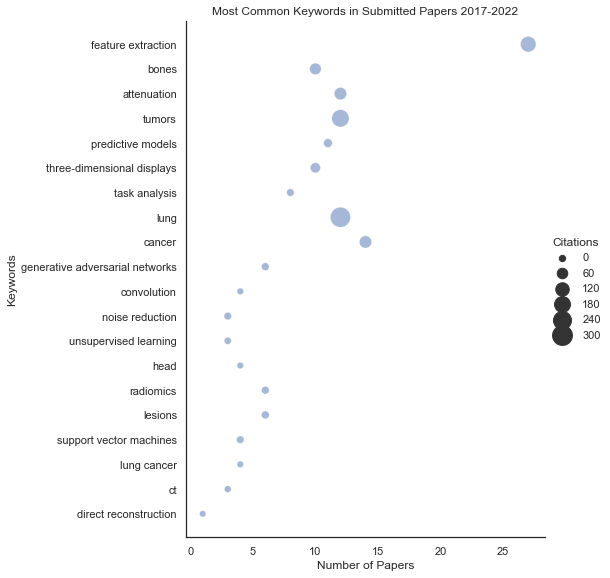

In [53]:
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Count", y="Term", size="Citations",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=8, data=df_counts_reduced)
plt.title('Most Common Keywords in Submitted Papers 2017-2022')
plt.xlabel('Number of Papers')
plt.ylabel('Keywords')

Text(0.5, 1.0, 'Distribution of Citations for the 5 most cited terms in 2017-2022')

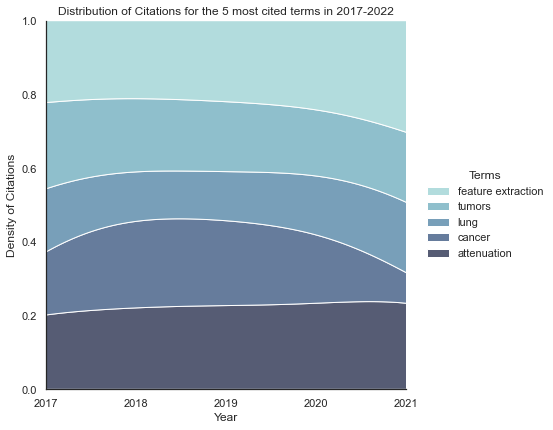

In [55]:
df_counts_five_max = df_counts[df_counts['Terms'].isin(
                               df_counts_reduced.sort_values(by='Citations', ascending=False)['Term'][:5])]
sns.displot(
    data=df_counts_five_max,
    x='Year', hue='Terms',
    kind='kde', height=6,
    multiple='fill', clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75"
)

plt.xlim(2017, 2021)
plt.xlabel('Year')
plt.xticks([year for year in range(2017,2022)])
plt.ylabel('Density of Citations')
plt.title('Distribution of Citations for the 5 most cited terms in 2017-2022')
